In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import re
from google.colab import files

In [33]:
url = 'https://raw.githubusercontent.com/TonyBMB/Python_course/refs/heads/main/Exercise%2034.csv'
df = pd.read_csv(url)
df.head()

,Gene Name,Control_1,Control_2,Control_3,KO_1,KO_2,KO_3
0,rpoC,32144000.0,27876000.0,16709000.0,25664000.0,27452000.0,21104000.0
1,gdhZ,30783000.0,27132000.0,16343000.0,19289000.0,21274000.0,17230000.0
2,rpoB,32908000.0,29162000.0,16587000.0,26168000.0,27069000.0,20876000.0
3,putA,41257000.0,36150000.0,24990000.0,24859000.0,27692000.0,23306000.0
4,gltB,4974600.0,4334200.0,3135400.0,2797400.0,2852700.0,2198300.0


In [34]:
# Calculate mean for WT and DM replicates
df['Control_Mean'] = df[['Control_1', 'Control_2', 'Control_3']].mean(axis=1)
df['KO_Mean'] = df[['KO_1', 'KO_2', 'KO_3']].mean(axis=1)

In [35]:
# Calculate log2 fold-change
df['Log2_FC'] = np.log2(df['Control_Mean'] / df['KO_Mean'].replace(0, np.nan))

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
# Perform t-tests (two-sample assuming equal variance)
t_stats, p_values = ttest_ind(
    df[['Control_1', 'Control_2', 'Control_3']].values,
    df[['KO_1', 'KO_2', 'KO_3']].values,
    axis=1, nan_policy='omit'
)

# Add p-values and -log10(p-values) to the DataFrame
df['P_Value'] = p_values
df['MinusLog10_P'] = -np.log10(df['P_Value'])

df_filtered = df[np.isfinite(df['Log2_FC']) & np.isfinite(df['MinusLog10_P'])].copy()

In [37]:
# Define significance thresholds
p_value_threshold = 0.05
log2fc_threshold = 0.58

# Filter for genes that meet both p-value and log2 fold change cutoffs
significant_downregulated = df_filtered[(df_filtered['P_Value'] < p_value_threshold) & (df_filtered['Log2_FC'] < -log2fc_threshold)]
significant_upregulated = df_filtered[(df_filtered['P_Value'] < p_value_threshold) & (df_filtered['Log2_FC'] > log2fc_threshold)]

# Select the top 5 most downregulated and top 5 most upregulated significant genes
# These are selected based on the most extreme Log2_FC values among the significant ones
top_5_downregulated = significant_downregulated.sort_values(by='Log2_FC').head(5)
top_5_upregulated = significant_upregulated.sort_values(by='Log2_FC', ascending=False).head(5)

# Concatenate these top genes for labeling and highlighting in the plot
top_genes = pd.concat([top_5_downregulated, top_5_upregulated])

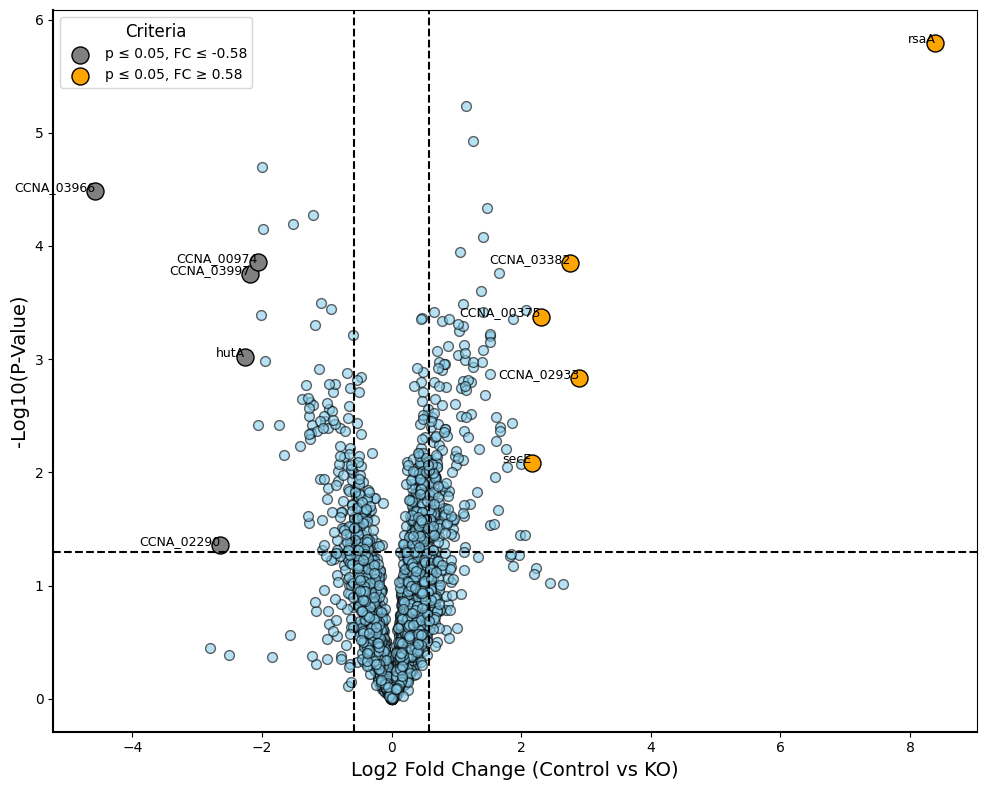

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# Separate significant genes for coloring
left_candidates = top_genes[top_genes['Log2_FC'] < 0.58]
right_candidates = top_genes[top_genes['Log2_FC'] > -0.58]

# Create the volcano plot
plt.figure(figsize=(10, 8))
plt.scatter(df_filtered['Log2_FC'], df_filtered['MinusLog10_P'], alpha=0.6, edgecolor='black', marker='o', s=50, color='#87CEEB')
# Highlight significant genes
plt.scatter(left_candidates['Log2_FC'], left_candidates['MinusLog10_P'], color='grey', s=150, edgecolor='black', marker='o', label='p ≤ 0.05, FC ≤ -0.58')
plt.scatter(right_candidates['Log2_FC'], right_candidates['MinusLog10_P'], color='orange', s=150, edgecolor='black', marker='o', label='p ≤ 0.05, FC ≥ 0.58')

# Add gene labels
for _, row in top_genes.iterrows():
    plt.text(row['Log2_FC'], row['MinusLog10_P'], row['Gene Name'], fontsize=9, ha='right')

# Add reference lines
plt.axhline(-np.log10(0.05), color='black', linestyle='--')
plt.axvline(0.58, color='black', linestyle='--')
plt.axvline(-0.58, color='black', linestyle='--')

# Add a border
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Update axis labels and add legend
plt.xlabel('Log2 Fold Change (Control vs KO)', fontsize=14)
plt.ylabel('-Log10(P-Value)', fontsize=14)
plt.legend(loc='best', fontsize=10, title='Criteria', title_fontsize=12)
# Save the plot as PNG (600 DPI) and PDF
png_path = 'volcano_plot1.png'
pdf_path = 'volcano_plot1.pdf'
plt.savefig(png_path, dpi=600, format='png')
plt.savefig(pdf_path, format='pdf')
plt.tight_layout()
# Show the plot
plt.show()
# Download the files
files.download(png_path)
files.download(pdf_path)
CSV_path = 'filtered_data.csv'
df_filtered.to_csv(CSV_path, index=False)
from google.colab import files
files.download(CSV_path)

